# 家の広さと値段の関係

In [257]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

sns.set()  #これでグラフ描画にseabornが使われるようになる

In [258]:
data = pd.read_csv("./pandas/datascience/単回帰/real_estate_price_size.csv")

In [259]:
data

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46
...,...,...
95,252460.400,549.80
96,310522.592,1037.44
97,383635.568,1504.75
98,225145.248,648.29


In [260]:
data.describe()

,price,size
count,100.000000,100.000000
mean,292289.470160,853.024200
std,77051.727525,297.941951
min,154282.128000,479.750000
25%,234280.148000,643.330000
50%,280590.716000,696.405000
75%,335723.696000,1029.322500
max,500681.128000,1842.510000


In [261]:
y =data["price"]
x1 = data["size"]

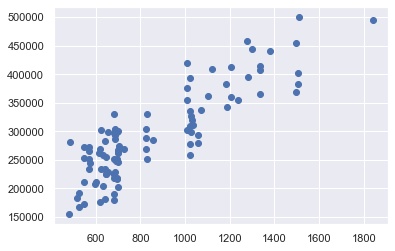

In [262]:
plt.scatter(x1,y)

## 統計値

In [263]:
x=sm.add_constant(x1)
results = sm.OLS(y,x).fit()

In [264]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Tue, 13 Oct 2020   Prob (F-statistic):           8.13e-31
Time:                        03:06:33   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e+05   1.19e+04      8.550      0.000    7.83e+04    1.26e+05
size         223.1787     13.199     16.909      0.000     196.986     249.371
==============================================================================
Omnibus:                        6.262   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.938
Skew:                           0.117   Prob(JB):                        0.230
Kurtosis:                       2.194   Cond. No.                     2.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 上の表の意味  
上から  
・モデルの要約に関する表  
・係数に関する表  
・検定に関する表  

### 表の重要な指標    
#### 係数の表  
coef:const→切片　　coef:size→sizeの重み　　
std_err:標準誤差→0に近ければ良い  
t:t値  
P>|t|:P検定→P<0.05であれば良い指標    
#### モデルの要約の表
Dep. Variable:従属変数→この指標を使うと良い  
Models:回帰の種類→OLS:最小二乗法  
R-squared:決定係数 0-1の間 1に近いと良い　しかし0.2-0.9をとる  
Adj. R-squared::自由度修正済み決定係数:決定係数より低く出る 高ければ高いほどよい  
F-statistic:F検定 H_0=0(帰無仮説が0) 0に近いとだめ  
Prob (F-statistic):F値　上から0に近いのが好ましい

# 重回帰分析

In [265]:
data2 = pd.read_csv("./pandas/datascience/重回帰/sample.csv")

In [266]:
data2

,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009
...,...,...,...
95,252460.400,549.80,2009
96,310522.592,1037.44,2009
97,383635.568,1504.75,2006
98,225145.248,648.29,2015


In [267]:
data2.describe()

,price,size,year
count,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000
std,77051.727525,297.941951,4.729021
min,154282.128000,479.750000,2006.000000
25%,234280.148000,643.330000,2009.000000
50%,280590.716000,696.405000,2015.000000
75%,335723.696000,1029.322500,2018.000000
max,500681.128000,1842.510000,2018.000000


In [268]:
y2=data2["price"]
x2 = data2[["size","year"]]

In [269]:
xx=sm.add_constant(x1)
results2 = sm.OLS(y2,x2).fit()

In [270]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                              2946.
Date:                Tue, 13 Oct 2020   Prob (F-statistic):                    2.99e-88
Time:                        03:06:34   Log-Likelihood:                         -1198.1
No. Observations:                 100   AIC:                                      2400.
Df Residuals:                      98   BIC:                                      2405.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
size         222.9545     13.161     16.940      0.000     196.836     249.073
year          50.7478      5.906      8.593      0.000      39.028      62.467
==============================================================================
Omnibus:                        6.367   Durbin-Watson:                   2.268
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                2.966
Skew:                           0.118   Prob(JB):                        0.227
Kurtosis:                       2.190   Cond. No.                         8.03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 回帰モデル skleran

In [271]:
from sklearn.linear_model import LinearRegression

In [272]:
data = pd.read_csv("./pandas/datascience/単回帰/real_estate_price_size.csv")

In [273]:
yy =data["price"]
xx1 = data["size"]

In [274]:
reg = LinearRegression()

In [275]:
x_matrix = xx1.values.reshape(-1,1)
type(x_matrix)

numpy.ndarray

In [276]:
reg.fit(x_matrix,yy)

LinearRegression()

### 決定係数

In [277]:
reg.score(x_matrix,yy)

0.7447391865847586

### 予測

In [278]:
reg.predict(x_matrix)

array([245436.6193764 , 248366.95626666, 210665.37128016, 437740.81472046,
       386568.16083095, 230282.78275422, 229323.11416106, 240466.42877881,
       254178.53072383, 256914.70210804, 338562.41329885, 513121.66681922,
       256914.70210804, 327155.74776484, 392259.21876711, 409836.77653386,
       256026.45071251, 241162.74645571, 253912.94802014, 331286.78629026,
       240441.87911713, 224591.72481806, 371389.77454709, 217603.99838742,
       219262.2164449 , 348145.70850586, 229323.11416106, 399655.36229669,
       253912.94802014, 435868.3450701 , 327396.78080684, 253912.94802014,
       235351.17199854, 219262.2164449 , 293297.30072581, 240946.26307539,
       285635.57449254, 229180.2797658 , 254897.16627498, 257756.08596762,
       329990.11779579, 254178.53072383, 285635.57449254, 399655.36229669,
       338562.41329885, 257756.08596762, 243227.14982471, 257756.08596762,
       243227.14982471, 239625.04491923, 246420.83763124, 329990.11779579,
       329990.11779579, 2

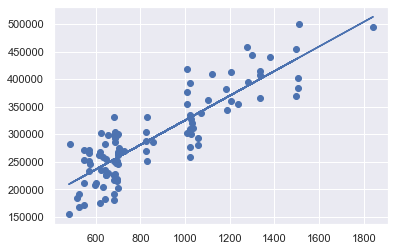

In [279]:
# 散布図
plt.scatter(x_matrix, yy)
 
# 回帰直線
plt.plot(x_matrix, reg.predict(x_matrix))

### 値を入れて予測

In [280]:
new = pd.DataFrame(data=[190000,300000],columns=["price"])

In [281]:
reg.predict(new)

array([42505873.69477666, 67055535.3801835 ])

# 重回帰分析

In [282]:
# 自由度修正済み決定係数を算出

In [283]:
r2 = reg.score(x_matrix,yy)

In [284]:
n = x_matrix.shape[0]
p = x_matrix.shape[1]

In [285]:
#以下が自由度修正済み決定係数

In [286]:
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)

In [287]:
adjusted_r2

0.742134484407052

In [288]:
## ここから重回帰

In [289]:
data2 = pd.read_csv("./pandas/datascience/重回帰/sample.csv")

In [290]:
data2

,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009
...,...,...,...
95,252460.400,549.80,2009
96,310522.592,1037.44,2009
97,383635.568,1504.75,2006
98,225145.248,648.29,2015


In [291]:
y2=data2["price"]
x2 = data2[["size","year"]]

In [292]:
type(x2)

pandas.core.frame.DataFrame

In [293]:
reg2 = LinearRegression()

In [294]:
reg2.fit(x2,y2)

LinearRegression()

In [295]:
reg2.score(x2,y2)

0.7764803683276793

### P値の代替えメソッドの導入

In [296]:
from sklearn.feature_selection import  f_regression

In [297]:
f_regression(x2,y2)
# array([F値],[P値])

(array([285.92105192,   0.85525799]), array([8.12763222e-31, 3.57340758e-01]))

In [298]:
p_val = f_regression(x2,y2)[1]

In [299]:
p_val

array([8.12763222e-31, 3.57340758e-01])

In [300]:
p_val.round(3) #少数3桁まで

array([0.   , 0.357])

In [301]:
reg2_summary = pd.DataFrame(data = x2.columns.values,columns=["feature"])
reg2_summary

,feature
0,size
1,year


In [302]:
reg2_summary["p-values"] = p_val.round(3)

In [303]:
reg2_summary["coefficient"] = adjusted_r2

In [304]:
reg2_summary

,feature,p-values,coefficient
0,size,0.000,0.742134
1,year,0.357,0.742134


## 標準化 N~(0,1) に変更

In [305]:
from sklearn.preprocessing import StandardScaler

In [306]:
scaler = StandardScaler()

In [307]:
scaler.fit(x2)

StandardScaler()

In [308]:
x_scaled = scaler.transform(x2)

In [309]:
xx2 = pd.DataFrame(x_scaled)

In [310]:
xx2

,0,1
0,-0.708164,0.510061
1,-0.663873,-0.765092
2,-1.233719,1.147638
3,2.198445,0.510061
4,1.424989,-0.765092
...,...,...
95,-1.022856,-0.765092
96,0.622084,-0.765092
97,2.198445,-1.402669
98,-0.690623,0.510061


In [311]:
xx2.describe()

,0,1
count,1.000000e+02,1.000000e+02
mean,5.184742e-16,1.935785e-14
std,1.005038e+00,1.005038e+00
min,-1.259154e+00,-1.402669e+00
25%,-7.073546e-01,-7.650921e-01
50%,-5.283184e-01,5.100614e-01
75%,5.947013e-01,1.147638e+00
max,3.337800e+00,1.147638e+00


In [312]:
### 下記も同じ

In [313]:
from sklearn.preprocessing import MinMaxScaler

In [314]:
x_scaled2 = scaler.transform(x2)

In [315]:
xxx2 = pd.DataFrame(x_scaled2)

In [316]:
xxx2

,0,1
0,-0.708164,0.510061
1,-0.663873,-0.765092
2,-1.233719,1.147638
3,2.198445,0.510061
4,1.424989,-0.765092
...,...,...
95,-1.022856,-0.765092
96,0.622084,-0.765092
97,2.198445,-1.402669
98,-0.690623,0.510061


In [317]:
reg3 = LinearRegression()
reg3.fit(x_scaled,y2)

LinearRegression()

In [318]:
reg3.score(x_scaled,y2)

0.7764803683276793

In [319]:
reg3.coef_

array([67501.57614152, 13724.39708231])

In [320]:
reg3.intercept_

292289.4701599997

In [321]:
from sklearn.model_selection import train_test_split

In [327]:
## トレインデータとテストデータの分割

In [328]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y2,
                                                random_state=42,
                                                shuffle=False)

In [329]:
x_train.shape

(75, 2)

In [330]:
y_train.shape

(75,)

In [331]:
x_test.shape

(25, 2)